<a href="https://colab.research.google.com/github/RoisulIslamRumi/MNIST-PyTorch/blob/main/MNist_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import required libraries
import torch #imports all essential modules to build NN
import torchvision #to preprocess and transforma the data
import torch.nn as nn
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt
from torch import optim
import numpy as np
%matplotlib inline

Normalize does the following for each channel: 
**image = (image - mean) / std**

The parameters **mean**, **std** are passed as 0.5, 0.5 which will normalize the image in the range [-1,1]. For example, the minimum value 0 will be converted to (0-0.5)/0.5=-1, the maximum value of 1 will be converted to (1-0.5)/0.5=1.

To get your image back in [0,1] range the equation would be:

image = ((image * std) + mean) 

In [ ]:
mean = 0.5
std = 0.5
#'Transforms' converts the images to tensor and preprocess them to normalize 
# with a SD of 1
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])
trainset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', train=True,
                                      transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [ ]:
num_of_images = trainloader.dataset.data.shape[0]
height = trainloader.dataset.data.shape[1]
width = trainloader.dataset.data.shape[2]

In [ ]:
input_size = height * width
hidden_layers = [128,64]
output_size = 10


In [ ]:
from torch.nn.modules.linear import Linear
model = nn.Sequential(nn.Linear(input_size,hidden_layers[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_layers[0],hidden_layers[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_layers[1], output_size),
                      nn.LogSoftmax(dim=1)
                      )
print(model)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
epochs = 5
loss = 0
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    #Flatten the image from 28*28 to 784*1 column vector
    images = images.view(images.shape[0], -1)

    #set grad to 0
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output,labels)

    #backprop
    loss.backward()

    #update the grads
    optimizer.step()
    running_loss += loss.item()
    loss = running_loss
print("Training loss:",(loss/len(trainloader)))


Training loss: 0.37707768968427613


In [ ]:
def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

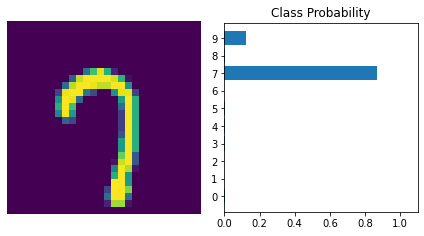

In [ ]:
# Getting the image to test
images, labels = next(iter(trainloader))

img = images[0].view(1,784)

with torch.no_grad():
  logps = model(img)

ps = torch.exp(logps)
view_classify(img,ps)
